<a href="https://colab.research.google.com/github/ayami-n/Jax_vs-_Numpy_LinearRegression/blob/main/Jax_LinerRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import library

In [23]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from numpy import float64
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

##Simple Linear Regression



StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges



In [ ]:
data = pd.read_csv("Salary_Data.CSV")
X = data.Salary.values
Y = data.YearsExperience.to_list()

sc = StandardScaler()
X = X.reshape(-1,1)
X = sc.fit_transform(X)

jX = jnp.array(X)
jY = jnp.array(Y)

Make a dataset x and y (this is Linear float64)

In [16]:
# use a lot of RAM (for JAX)
x = np.arange(0, 1, 0.000001, dtype=float64) 
y = np.arange(1, 2, 0.000001, dtype=float64)

In [3]:
# for make Numpy condition
nx = np.arange(0, 1, 0.0001, dtype=float64)
ny = np.arange(1, 2, 0.0001, dtype=float64)

 Convert numpy dataset to jax numpy 

In [3]:
with jax.experimental.enable_x64():
  
  jx = jnp.array(x).astype(float64)
  jy = jnp.array(y).astype(float64)
  
  jnx = jnp.array(nx).astype(float64)
  jny = jnp.array(ny).astype(float64)




*   np.float64-- It means that each value in the numpy array would be a float of size 64
*   0.000001 is use inspace(step)



Generate the data. Calculate xmean, ymean, Sxx, Sxy to find the value of slope and intercept of regression line.

In [18]:
@jax.jit
def calculate(x,y):
  x_mean = x.mean()
  y_mean = y.mean()
  n = jnp.size(x)
  sxy = (x - x_mean)*(y - y_mean)
  sxx = (x - x_mean)**2
  syy = (y - y_mean)**2
  sxy_sum = jnp.sum(sxy)
  sxx_sum = jnp.sum(sxx)
  syy_sum = jnp.sum(syy)
  slope = sxy_sum/sxx_sum
  intercept = y_mean - slope* x_mean
  y_pred = slope * x + intercept
  error = y- y_pred
  squared_error = error**2
  squared_error_sum = jnp.sum(squared_error)
  return n, syy_sum, y_pred, squared_error_sum

In [5]:
n, syy_sum, y_pred, squared_error_sum = calculate(x,y)

slope = 1.0
syy_sum = 83333.33
intercept = 1.0000002
y_pred = [1.0000002 1.0000012 1.0000023 ... 1.9999973 1.9999982 1.9999993]
squared_error = [5.684342e-14 5.684342e-14 5.684342e-14 ... 5.684342e-14 5.684342e-14
 5.684342e-14]
squared_error_sum = 5.923137e-08


Analyze the performance of the model by calculating mean squared error and R2

In [6]:
mse = squared_error_sum / n
rmse = jnp.sqrt(mse)
R2 = 1-(squared_error_sum / syy_sum)

 Use scikit library to confirm the above steps.

In [24]:
x = x.reshape(-1,1)
regression_model = LinearRegression()
  
# Fit the data(train the model)
regression_model.fit(x, y)
  
# Predict
y_predicted = regression_model.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
  
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [1.]
Intercept: 1.0000000000000007
MSE: 1.110622674533916e-30
Root mean squared error:  1.0538608421105303e-15
R2 score:  1.0


##Plot Linear regression





slope b1 is 2.8
intercept b0 is 6.200000000000001


Text(0, 0.5, 'y')

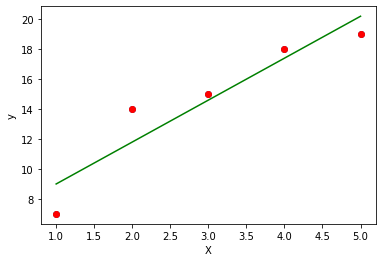

In [33]:
n_size = np.size(x1)
  
x1_mean = np.mean(x1)
y1_mean = np.mean(y1)

Sxy = np.sum(x1*y1)-n_size*x1_mean*y1_mean
Sxx = np.sum(x1*x1)-n_size*x1_mean*x1_mean
  
b1 = Sxy/Sxx
b0 = y1_mean-b1*x1_mean
print('slope b1 is', b1)
print('intercept b0 is', b0)
  
plt.scatter(x1,y1)
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')

y1_pred = b1 * x1 + b0
  
plt.scatter(x1, y1, color = 'red')
plt.plot(x1, y1_pred, color = 'green')
plt.xlabel('X')
plt.ylabel('y')

##Comparing Numpy and JAX times

In [ ]:
# this is Salary and Year
%timeit LinearRegression().fit(X,Y)
%timeit calculate(jX,jY)

In [4]:
# this is Numpy use 0.0001
%timeit LinearRegression().fit([nx],[ny]) 
%timeit calculate(jnx,jny)

3.29 s ± 8.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# this is JAX version use 0.000001
%timeit calculate(jx,jy) 
# %timeit LinearRegression().fit([x],[y]) No results

107 µs ± 37.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
# Numpy
x1 = np.array([1,2,3,4,5])
y1 = np.array([7,14,15,18,19])
%timeit LinearRegression().fit([x1], [y1])

225 µs ± 7.03 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
# JAX
jx1 = jnp.array([1,2,3,4,5]).astype(float)
jy1 = jnp.array([7,14,15,18,19]).astype(float)
%timeit calculate(jx1,jy1)

81.1 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#Summary
Jax Numpy proved that they are capable of finishing their calculation time quicker than Numpy. First, Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. so I use it. Usually, when I use a small number dataset Numpy is better However, when I use many steps (float 64) Jax Numpy is faster. For example, Numpy could not handle those code x = np.arange(0, 1, 0.000001, dtype=float64) because it use a lot of RAM and JAX has JIT (Just In Time compilation).  This allows it to compile our Python functions into a super fast XLA-optimized executables.
